Q1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

Dataset This is the Dataset You can use this dataset for this question

## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import re
import sb

ModuleNotFoundError: No module named 'sb'

## Reading the Data

In [ ]:
import pandas as pd
df = pd.read_csv('instagram_reach.csv')

In [ ]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


## Data Preprocessing

### Understanding the data

In [ ]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

#### As we see we dnt have any missing values

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 94, dtype: bool

#### As we see we dnt have any duplicate values

## EDA

C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_18236\4163750519.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Followers'])


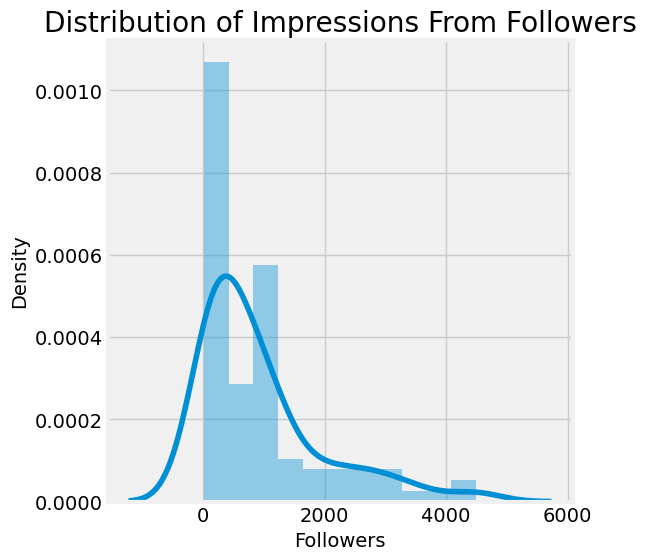

In [ ]:
plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_18236\2676874989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Likes'])


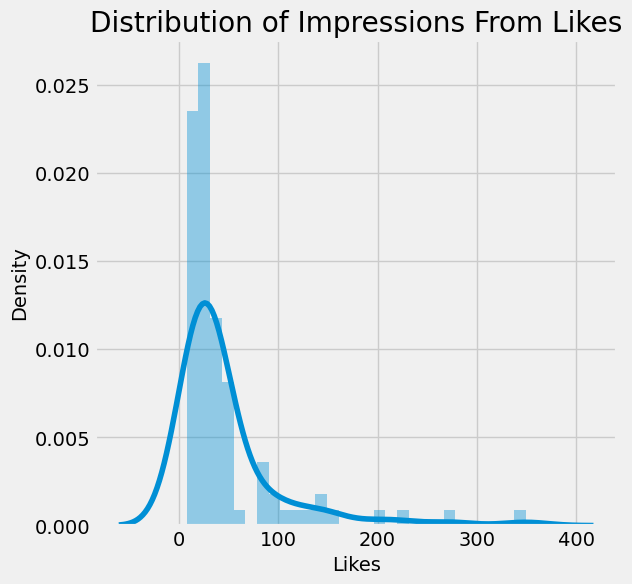

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

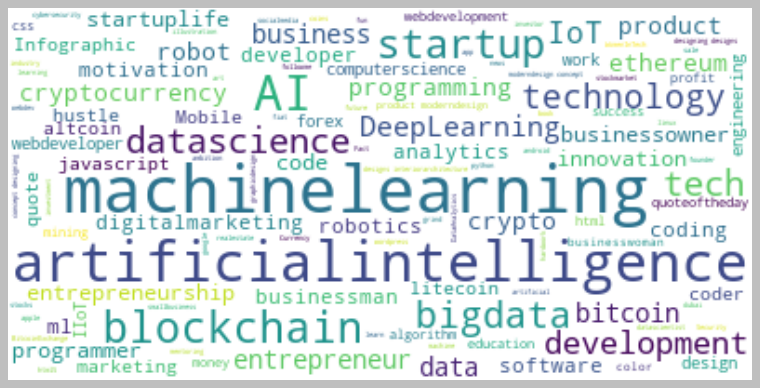

In [ ]:
#hastag variables
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

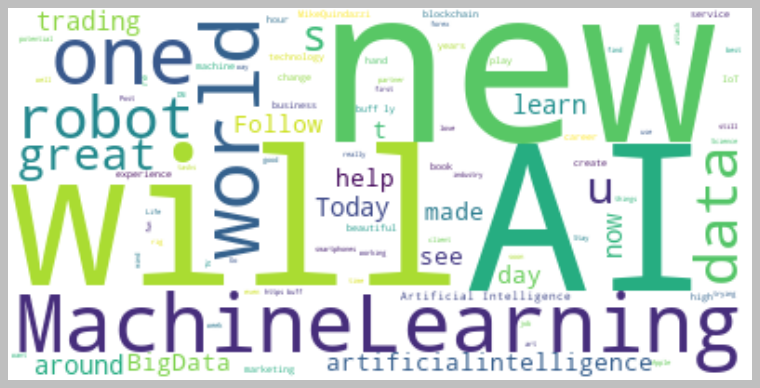

In [ ]:
#caption variabes
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Correlation 

In [ ]:
correlation = df.corr()
print(correlation["Followers"].sort_values(ascending=False))

Followers     1.000000
Likes         0.278040
Unnamed: 0    0.220225
S.No          0.165193
Name: Followers, dtype: float64


C:\Users\kundan Gupta\AppData\Local\Temp\ipykernel_18236\4048319164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
x = np.array(df[["Followers"]])
y = np.array(df["Likes"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

-12.102561512222145

In [ ]:
features = np.array([[1500]])
model.predict(features)

array([290.35128148])

### Relationship between followers and likes

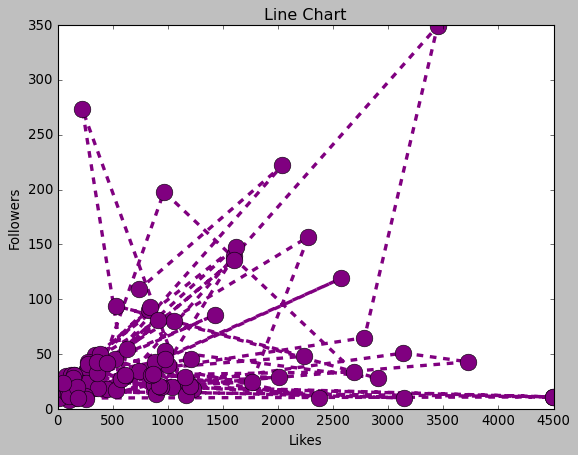

In [ ]:
x = df["Followers"]
y = df["Likes"]
plt.plot(x, y, color='purple', linewidth=3, marker='o',markersize=15, linestyle='--')
plt.title("Line Chart")
plt.ylabel('Followers')
plt.xlabel('Likes')
 
plt.show()

In [ ]:
# removing hours and typecasting to int
df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [ ]:
# Plotting Likes relationship with
# Followers and Hours since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = df, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

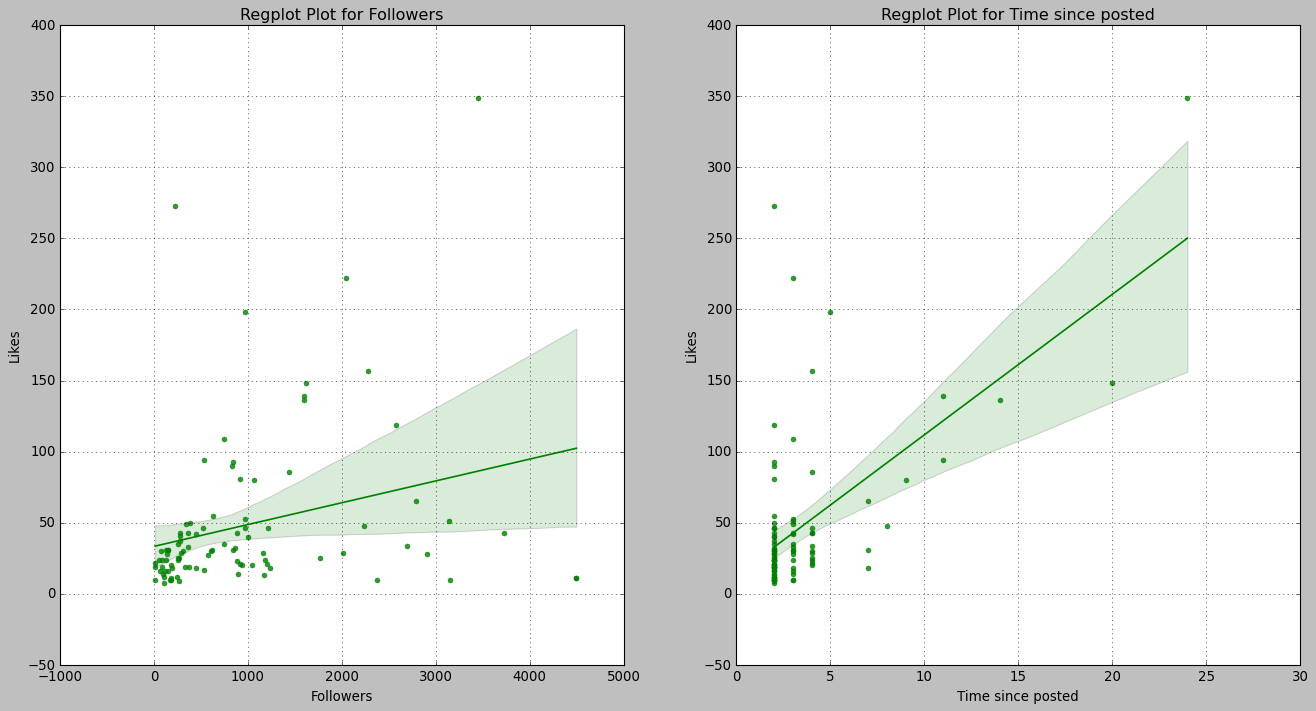

In [ ]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

In [ ]:
featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [ ]:
#diving targets by max values
targets = targets/maxValLikes

In [ ]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [ ]:
# for sake of conviniece 
# lets choose our model as 
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

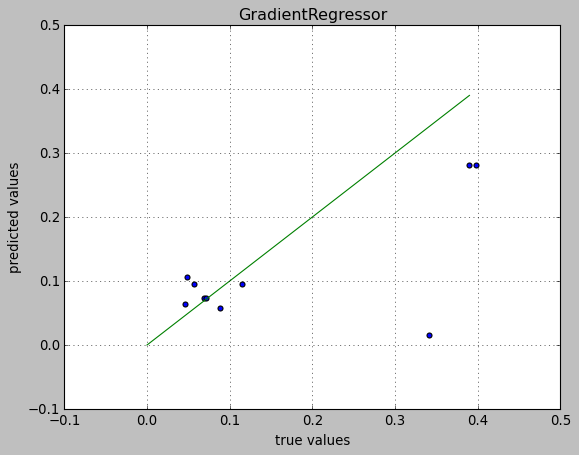

In [ ]:
# doing Some Benchmarks
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect is still workable. Lets do some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [ ]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

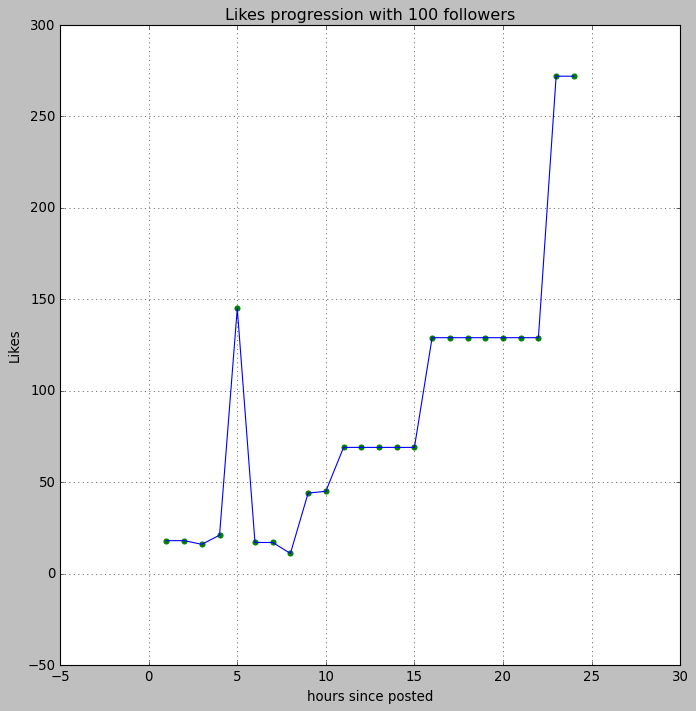

In [ ]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

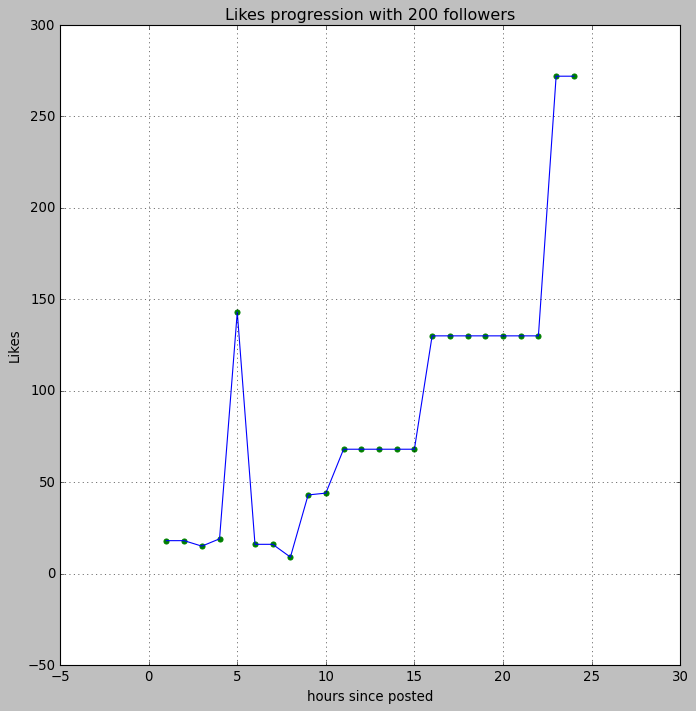

In [ ]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

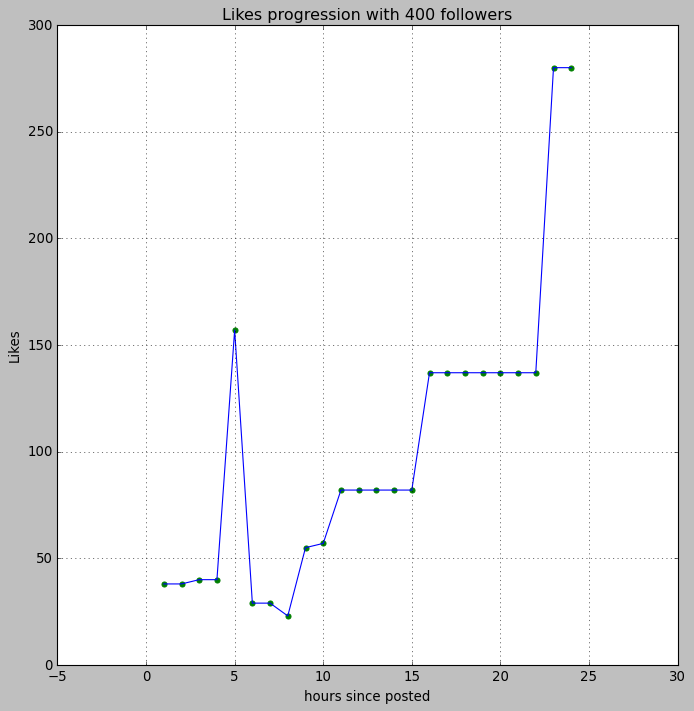

In [ ]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

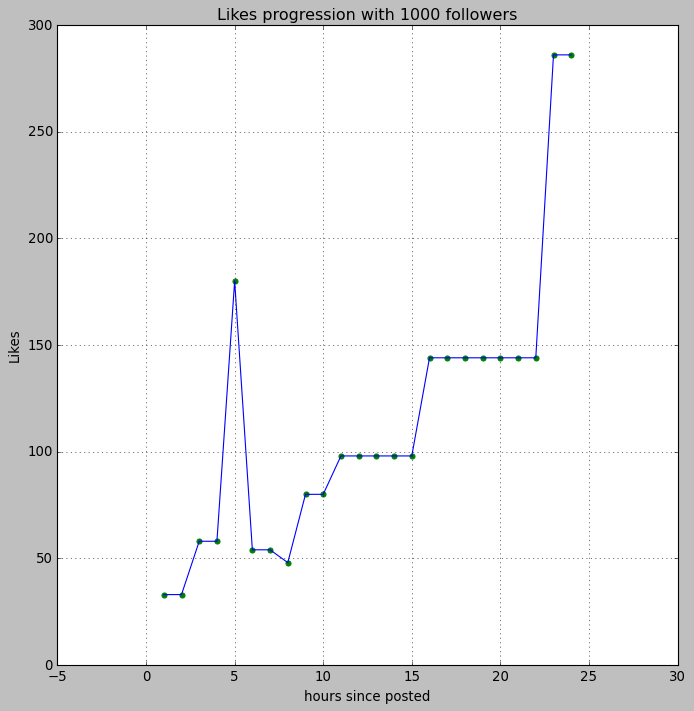

In [ ]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

According to this model we can infer one thing, that is, If you have higher number of followers your post will gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers yeild only about 20% increase in likes

In [ ]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

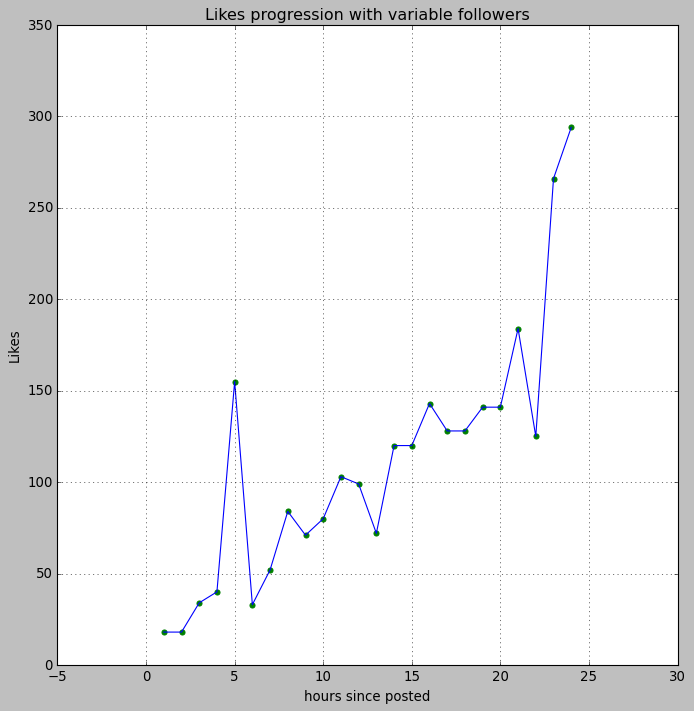

In [ ]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

If our predictive model is right, and case 2 is true then around 15 hours posts like will grow exponentially !! (In my opnion I dont believe so)

**Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Math & Statistics
import math
from collections import Counter
import scipy.stats as ss
from scipy.stats import chi2, \
                        chi2_contingency

#Metrics
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            confusion_matrix

import warnings
warnings.filterwarnings("ignore")

About Data
Each data entry (row) is refer to one online session, that can be from the same user or not within a period of 1-year. Totalizing 12,330 sessions.

The data has a set of variables like the type of page visited, amount of time spent, proximity to special dates, Browser used, and also Google Analytics Metrics like "Bounce Rate", "Exit Rate", and "Page Value".

For each entry, the column "Revenue" is marked as 1 if that session generated revenue.

In [ ]:
## Read the data
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

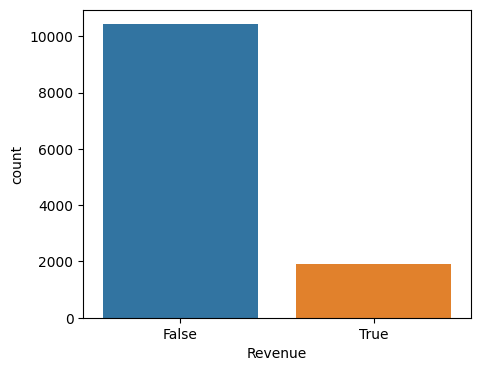

In [ ]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Revenue', data=df, ax=axs)

The Data is inbalanced, with roughly 85% (10422) of Non-Revenue vs 15% (1902) of Revenue sessions

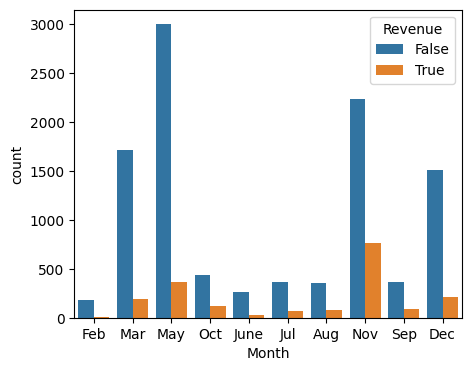

In [ ]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Month', data=df, ax=axs, hue='Revenue')

The Months with most online sessions are March, May, November and December. This may be caused by the important holiday, and special days in these months like:
Woman's Day (Mar)
Mother's day (May)
Brack Friday, and Thanks Giving (Nov)
Christmas , and Happy New Year (Dec)
Although there is a discrepancy between Revenue and Non-Revenue visitors, the distributions are similar. Showing that most of purchases was made in these months¶

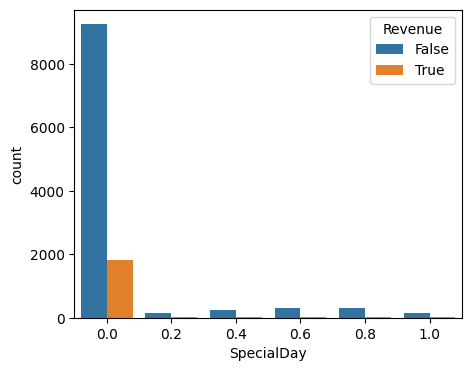

In [ ]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='SpecialDay', data=df, ax=axs, hue='Revenue')

If we take a look at the "SpecialDay" column, we can see that most of the often revenued sessions were made 13 days after or 1 day after especial days, considering the dynamics of e-commerce such as the duration between the order date and delivery date.

In [ ]:
df[['SpecialDay','Month','Revenue']].groupby('Month').sum()

,SpecialDay,Revenue
Month,,
Aug,0.0,76
Dec,0.0,216
Feb,43.0,3
Jul,0.0,66
June,0.0,29
Mar,0.0,192
May,714.4,365
Nov,0.0,760
Oct,0.0,115


The number of sessions close to special days was greater in May, and near of 51% of these sessions where revenued

In [ ]:
pd.crosstab(df['Weekend'],df['Revenue'], margins=True)

Revenue,False,True,All
Weekend,,,
False,8053,1409,9462
True,2369,499,2868
All,10422,1908,12330


And about week days, weekend improves Revenues by about 2,5% (17.40 % more Revenues in weekends against 14.90 % on weekdays)

In [ ]:
df[['BounceRates','Revenue']].groupby('Revenue').mean()

,BounceRates
Revenue,
False,0.025317
True,0.005117


The bounce rate measure the percentage of visitors who enter the site then leave. If this page is only your home page, it's not good, this means that your visitors don't take any action and leave your page.
Bounce Rate is greater in non-revened sessions (25% to non-revenue against 5% to revenue). Sessions, when the amount of people visiting the site is greater than these leaving, is more likely to be revenue

In [ ]:
df[['ExitRates','Revenue']].groupby('Revenue').mean()

,ExitRates
Revenue,
False,0.047378
True,0.019555


Exit Rate refer to the percentage of visitors to a page on the website from which they exit the website to a different website.
For revenued sessions, near of 20% of the sessions has started and ended at the same page, for non-revenued 50%. In other words, engaged people, who see more than only one page in the your site, has more chance to generate revenue

In [ ]:
df[['PageValues','Revenue']].groupby('Revenue').mean()

,PageValues
Revenue,
False,1.975998
True,27.264518


Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction. For revenued sessions, the average Page Value is 27.00 and for non-revenued is about 2.00

In [ ]:
from sklearn.model_selection import train_test_split
# Divide X and y
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)


In [ ]:
X.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [ ]:
X['Month']=LabelEncoder.fit_transform(X['Month'])
X['VisitorType']=LabelEncoder.fit_transform(X['VisitorType'])
X['Weekend']=LabelEncoder.fit_transform(X['Weekend'])

In [ ]:
y=LabelEncoder.fit_transform(y)

In [ ]:
y_train = y_train.map({True:1, False:0})
y_valid = y_valid.map({True:1, False:0})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

In [ ]:
# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.21%


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1960,   95],
       [ 171,  240]])

Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question

In [ ]:
data = pd.read_csv('/content/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [ ]:
data.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          2011
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

In [ ]:
data.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [ ]:
data = data.drop(columns=["id", "timestamp", "timezone", "product_id"])

In [ ]:
data.duplicated().sum()

2

In [ ]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
     

In [ ]:

# Unsupervised algorithm: K-means clustering for high booking areas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import folium
from sklearn.cluster import KMeans

X = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_